## Overview

The following notebook covers the iterative modeling and intepretations of the previously processed King County housing data.

Three final models and the steps that lead to their creation will be found below. The three final models and their associated goals are:

1) A Predictive Linear Regression Model for King County Housing 

    -Predict housing prices as accurately as possible
___________________________________________________________________________________
    
2) An Interprative Linear Regression Model for King County Housing Prices

    -Determine what features influence King County housing prices and by how much
    
 ___________________________________________________________________________________
    
3) A Predictive Linear Regression Model for King County Contract Rent Prices

    -Predict contract rent prices of housing in King County as accurately as possible

### OSEMN Process

1) Obtain: I have been given a large set of King County housing information, likely downloaded from this Kaggle link:
[King County Housing: Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). However, a large portion of this project was spent collecting and processing data to be added to this initial kaggle dataset. 

2) Scrub: Multiple Linear Regression Models require data to meet certain statistical and numerical requirements in order to achieve any substantial results. Therefore, a heavy amount of processing was required for this project, covered in the previous notebook.

3) Explore: The distrubtion of the data is crucial for linear regression models to function optimally. Covered in the last section.

4) Model: Build and refine the models of interest. This is the heart of this notebook.

5) Interpret: Finally, it is important to actually make sense of the findings given by the newly created models. This will be covered in detail at the end of this notebook as well as throughout the model iteration process.


## Business Problem

The Seattle Area is a highly sought out area for young adults in technical fields as well as for new families seeking an ideal place to live and raise their children. 
    
My intention is to build a model that can predict housing prices using a handful of variables that would be interesting to new families or individuals moving into King County, WA. I have engineered some features I am certain people would be interested in when considering moving into the area for the first time.
    
I also intend to create an interpretive model to be able to fully understand the individual contribution of my predictors. Some examples of what I intend to find the full effect of: Per Capita Income, Household Income, School District Rankings, and proximity to museums, parks, and large bodies of natural water. In this way, a family can hand select features as if they were selecting packages on a new or used vehicle, as well as get an understanding of what kind of properties people in the area are buying according to their incomes. Being able to visualize price tags on geological predictors such as these can prove useful to consumers in the housing market. 
    
Finally, I have attempted to include similar models with rent as the target instead of housing prices. Home ownership has become a less obtainable prospect for a large number of families and individuals. Therefore, it would make a lot of sense to create models to predict and interpret the cost of renting properties in the area as well.

In [1]:
#import all necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

#scale graph lables
sns.set_context('talk')

#pip install dataframe_image
import dataframe_image as dfi

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Assumption of Linear Regression Model:


- **Linearity:** The relationship between dependent and independent variables should be linear.
- **Homoscedasticity:** Constant variance of the errors should be maintained.
- **Multivariate normality**: Multiple Regression assumes that the residuals are normally distributed.
- **Lack of Multicollinearity**: It is assumed that there is little or no multicollinearity in the data.

### Baseline Model for Unfiltered Price Target

In [2]:
df1 = pd.read_csv('data/unfiltered_processed_data.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21597 non-null  float64
 1   bedrooms                 21597 non-null  int64  
 2   bathrooms                21597 non-null  float64
 3   sqft_living              21597 non-null  int64  
 4   sqft_lot                 21597 non-null  int64  
 5   floors                   21597 non-null  float64
 6   condition                21597 non-null  int64  
 7   grade                    21597 non-null  int64  
 8   new_waterfront           21597 non-null  float64
 9   district_grade_num       21597 non-null  int64  
 10  median_household_income  21597 non-null  float64
 11  income_per_capita        21597 non-null  float64
 12  median_rent              21597 non-null  float64
 13  health_disparity_index   21597 non-null  float64
 14  museum_zipcode        

In [3]:
X = df1.drop(['price','median_rent'] , axis=1)
y= df1.price

In [4]:
# We specify random seed so that the train and test data set always have the same rows, respectively

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 111)

In [5]:
baseline_price_lm = LinearRegression()
# Fit the model on X_train_final and y_train
baseline_price_lm.fit(X_train, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = baseline_price_lm.predict(X_train)
y_hat_test = baseline_price_lm.predict(X_test)


train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',baseline_price_lm.score(X_train, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ', baseline_price_lm.score(X_test, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.7444160468196592
Train Mean Absolute Error: 111655.52878283468
--------------------------------------------------
Test Score:  0.7485990569968313
Test Mean Absolute Error: 114845.8225577744


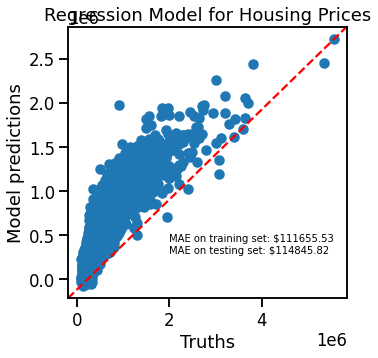

In [6]:
string_score = f'MAE on training set: ${train_mae:.2f}'
string_score += f'\nMAE on testing set: ${test_mae:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_hat_test)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(2000000, 300000, string_score)
plt.title('Regression Model for Housing Prices')
plt.ylabel('Model predictions')
plt.xlabel('Truths');

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


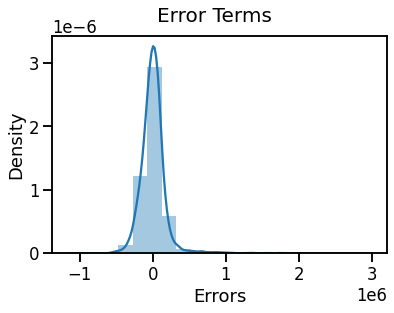

In [7]:
# Plot the histogram of the error terms

fig = plt.figure()

preds = y_hat_test
residuals = (y_test - preds)


sns.distplot(residuals, bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                

plt.xlabel('Errors', fontsize = 18);

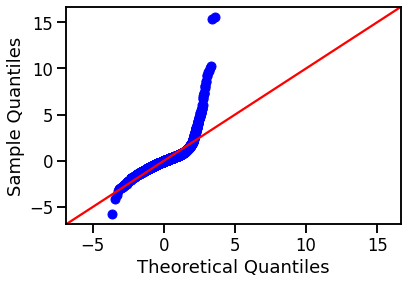

In [8]:
import scipy.stats as stats
preds = y_hat_test
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

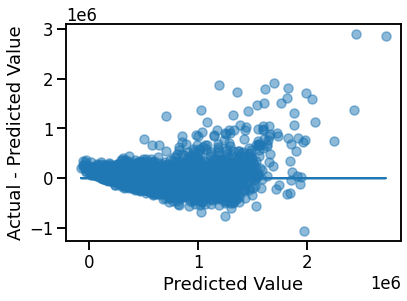

In [9]:
#test for homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [10]:
def VIF_calculator(X_train):

# Creating a dataframe that will contain the names of all the feature variables and their VIFs

    vif = pd.DataFrame()

    vif['Features'] = X_train.columns

    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [11]:
VIF_calculator(X_train)

,Features,VIF
6,grade,95.86
10,income_per_capita,45.01
8,district_grade_num,43.83
9,median_household_income,41.10
5,condition,30.50
1,bathrooms,29.14
0,bedrooms,24.21
2,sqft_living,22.38
4,floors,15.41
11,health_disparity_index,7.97


##### Summary of Unfiltered Price Model Performance

Train Score:  0.7444160468196592
Train Mean Absolute Error: 111655.52878283468

Test Score:  0.7485990569968313
Test Mean Absolute Error: 114845.8225577744

The model proved to be slightly underfit with decent R-Squared values for training and testing data (nearly 0.75 for test data). The MAE value was similar for both testing and training, and reveal an error of nearly $115,000 dollars for price predictions. The plot of the predicted values vs true values did not show a very smooth linear relationship. The QQ plot and distribution plot of the residuals reveal a large right skew and a long right tail for the distrubtion of errors. This does not obey the assumtion of normal distrubtion for error terms. Furthermore, the test for homoscedasticity revealed a cone shape for the residuals and a violation of another assumption of multiple linear regression. Very high VIF scores for nearly half of the predictors also expose large multicolinearity issues. 

## Filtered Data Model Iteration: Price Target

#### First Model: Predictive

The first model I want to create will include all of my preprocessed predictors. The goal of this model is to create a predictive model with the best performance. After iterating and testing (which you will see much of below) I have selected this first model with my filtered data to be my predictive model with housing price as my target.

The next series of model iterations will be to create inferential modeles in order to get a better understanding of a handful of interesting pricing model coefficients. I will touch on that more below.

In [12]:
new_df = pd.read_csv('data/filtered_processed_data.csv')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19715 entries, 0 to 19714
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    19715 non-null  float64
 1   bedrooms                 19715 non-null  int64  
 2   bathrooms                19715 non-null  int64  
 3   sqft_living              19715 non-null  int64  
 4   sqft_lot                 19715 non-null  int64  
 5   condition                19715 non-null  int64  
 6   grade                    19715 non-null  int64  
 7   new_waterfront           19715 non-null  float64
 8   district_grade_num       19715 non-null  int64  
 9   median_household_income  19715 non-null  float64
 10  income_per_capita        19715 non-null  float64
 11  median_rent              19715 non-null  float64
 12  health_disparity_index   19715 non-null  float64
 13  museum_zipcode           19715 non-null  float64
 14  stadium_zipcode       

In [13]:
new_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,new_waterfront,district_grade_num,median_household_income,...,median_rent,health_disparity_index,museum_zipcode,stadium_zipcode,golf_zipcode,near_park,age_at_sale,recently_renovated,has_basement,multi_story
count,1.971500e+04,19715.000000,19715.000000,19715.000000,1.971500e+04,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,...,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000,19715.000000
mean,4.665668e+05,3.308953,1.973726,1937.922546,1.430002e+04,3.407862,7.488106,0.081968,9.637332,101507.598022,...,1456.377428,4.970175,0.178494,0.136241,0.421608,0.730510,43.865077,0.011463,0.368856,0.481664
std,2.006484e+05,0.865371,0.663028,726.798512,3.935043e+04,0.648602,1.005816,0.274323,1.939991,31279.824553,...,328.520721,2.788170,0.382937,0.343053,0.493829,0.443706,29.201002,0.106454,0.482507,0.499676
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,3.000000,0.000000,6.000000,20950.000000,...,550.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,3.110000e+05,3.000000,2.000000,1390.000000,5.000000e+03,3.000000,7.000000,0.000000,8.000000,81216.000000,...,1227.000000,2.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
50%,4.300000e+05,3.000000,2.000000,1830.000000,7.486000e+03,3.000000,7.000000,0.000000,10.000000,99696.000000,...,1422.000000,5.000000,0.000000,0.000000,0.000000,1.000000,41.000000,0.000000,0.000000,0.000000
75%,5.850415e+05,4.000000,2.000000,2400.000000,1.020000e+04,4.000000,8.000000,0.000000,11.000000,119423.000000,...,1678.000000,7.000000,0.000000,0.000000,1.000000,1.000000,63.000000,0.000000,1.000000,1.000000
max,1.120000e+06,7.000000,6.000000,4220.000000,1.651359e+06,5.000000,12.000000,1.000000,12.000000,210341.000000,...,2423.000000,10.000000,1.000000,1.000000,1.000000,1.000000,115.000000,1.000000,1.000000,1.000000


In [14]:
X = new_df.drop(['price', 'median_rent'], axis=1)
y =  new_df.price

In [15]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 111)

In [16]:
#create intial predictive model and check
#all p-values

import statsmodels.api as sm

X_train_p = sm.add_constant(X_train)

lr_p = sm.OLS(y_train, X_train_p).fit()

lr_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     2567.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:03   Log-Likelihood:            -1.7765e+05
No. Observations:               13800   AIC:                         3.553e+05
Df Residuals:                   13780   BIC:                         3.555e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.359e+05   1.22e+04    -51.914      0.000    -6.6e+05   -6.12e+05
bedrooms                -4558.7174   1216.165     -3.748      0.000   -6942.567   -2174.868
bathrooms                 1.12e+04   1691.958      6.619      0.000    7883.090    1.45e+04
sqft_living               107.0348      2.041     52.441      0.000     103.034     111.035
sqft_lot                    0.1962      0.022      8.917      0.000       0.153       0.239
condition                1.637e+04   1357.480     12.062      0.000    1.37e+04     1.9e+04
grade                    5.547e+04   1283.178     43.227      0.000     5.3e+04     5.8e+04
new_waterfront           2.901e+04   2972.133      9.760      0.000    2.32e+04    3.48e+04
district_grade_num       1.473e+04    592.988     24.842      0.000    1.36e+04    1.59e+04
median_household_income    -1.1826      0.050    -23.763      0.000      -1.280      -1.085
income_per_capita           6.4292      0.109     58.793      0.000       6.215       6.644
health_disparity_index  -2170.0703    496.842     -4.368      0.000   -3143.948   -1196.193
museum_zipcode           1.708e+04   2231.672      7.654      0.000    1.27e+04    2.15e+04
stadium_zipcode          3570.1540   2517.712      1.418      0.156   -1364.904    8505.212
golf_zipcode            -1.326e+04   1718.312     -7.719      0.000   -1.66e+04   -9896.223
near_park                4.215e+04   2133.253     19.757      0.000     3.8e+04    4.63e+04
age_at_sale              1180.2714     38.536     30.627      0.000    1104.735    1255.808
recently_renovated       4.417e+04   7707.736      5.730      0.000    2.91e+04    5.93e+04
has_basement            -7404.1185   1961.441     -3.775      0.000   -1.12e+04   -3559.427
multi_story              1.068e+04   2003.234      5.333      0.000    6757.046    1.46e+04
==============================================================================
Omnibus:                     1180.049   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2764.365
Skew:                           0.527   Prob(JB):                         0.00
Kurtosis:                       4.922   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#remove feature with insigificant p-value

X_train_p = X_train.drop('stadium_zipcode', axis=1)
X_test_p = X_test.drop('stadium_zipcode', axis=1)

X_train_pm = sm.add_constant(X_train_p)

lr_p = sm.OLS(y_train, X_train_pm).fit()

lr_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     2709.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:03   Log-Likelihood:            -1.7765e+05
No. Observations:               13800   AIC:                         3.553e+05
Df Residuals:                   13781   BIC:                         3.555e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.365e+05   1.22e+04    -51.990      0.000    -6.6e+05   -6.12e+05
bedrooms                -4539.2333   1216.132     -3.733      0.000   -6923.018   -2155.449
bathrooms                1.124e+04   1691.829      6.641      0.000    7919.337    1.46e+04
sqft_living               106.8208      2.036     52.478      0.000     102.831     110.811
sqft_lot                    0.1963      0.022      8.924      0.000       0.153       0.239
condition                1.642e+04   1357.140     12.099      0.000    1.38e+04    1.91e+04
grade                    5.553e+04   1282.440     43.302      0.000     5.3e+04     5.8e+04
new_waterfront           2.888e+04   2970.907      9.721      0.000    2.31e+04    3.47e+04
district_grade_num       1.463e+04    588.894     24.847      0.000    1.35e+04    1.58e+04
median_household_income    -1.1795      0.050    -23.723      0.000      -1.277      -1.082
income_per_capita           6.4487      0.108     59.445      0.000       6.236       6.661
health_disparity_index  -2027.4937    486.579     -4.167      0.000   -2981.255   -1073.732
museum_zipcode           1.687e+04   2226.837      7.576      0.000    1.25e+04    2.12e+04
golf_zipcode            -1.332e+04   1717.921     -7.754      0.000   -1.67e+04   -9952.997
near_park                4.172e+04   2111.907     19.754      0.000    3.76e+04    4.59e+04
age_at_sale              1180.0001     38.537     30.620      0.000    1104.461    1255.539
recently_renovated        4.42e+04   7707.981      5.734      0.000    2.91e+04    5.93e+04
has_basement            -7425.2852   1961.456     -3.786      0.000   -1.13e+04   -3580.564
multi_story              1.086e+04   1999.461      5.431      0.000    6940.380    1.48e+04
==============================================================================
Omnibus:                     1187.889   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2784.575
Skew:                           0.530   Prob(JB):                         0.00
Kurtosis:                       4.928   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I am happy to keep all of these variables, as they are all significant. There are very likely to be large multicolinearity issues based on the large condition number. However, I will not try to reduce this for my predictive model.

Although multicolinearity increases the error involved in the coefficients of the regression model, it actually has little affect on the overall predictive performance of the model. I will create seperate inferential models later to better understand some key individual features. 

Multicolinearity can cause your model to be overfit. However, the model is shown to be only slightly overfit after testing the model against training data.

The performance of this predictive model is carried out below. A check against the assumptions of multiple linear regression was also carried out. 

In [18]:
price_lpm = LinearRegression()

# Fit the model on X_train_final and y_train
price_lpm.fit(X_train_p, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lpm.predict(X_train_p)
y_hat_test = price_lpm.predict(X_test_p)

train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lpm.score(X_train_p, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ', price_lpm.score(X_test_p, y_test))
print('Test Mean Absolute Error:', test_mae)

print('\nThe Model is overfit.')

Train Score:  0.7796727579611459
Train Mean Absolute Error: 70452.14337001787
--------------------------------------------------
Test Score:  0.7722599700234719
Test Mean Absolute Error: 71080.22300422823

The Model is overfit.


In [19]:
X_train_p.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition',
       'grade', 'new_waterfront', 'district_grade_num',
       'median_household_income', 'income_per_capita',
       'health_disparity_index', 'museum_zipcode', 'golf_zipcode', 'near_park',
       'age_at_sale', 'recently_renovated', 'has_basement', 'multi_story'],
      dtype='object')

In [20]:
X_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13800 entries, 15293 to 12116
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 13800 non-null  int64  
 1   bathrooms                13800 non-null  int64  
 2   sqft_living              13800 non-null  int64  
 3   sqft_lot                 13800 non-null  int64  
 4   condition                13800 non-null  int64  
 5   grade                    13800 non-null  int64  
 6   new_waterfront           13800 non-null  float64
 7   district_grade_num       13800 non-null  int64  
 8   median_household_income  13800 non-null  float64
 9   income_per_capita        13800 non-null  float64
 10  health_disparity_index   13800 non-null  float64
 11  museum_zipcode           13800 non-null  float64
 12  golf_zipcode             13800 non-null  float64
 13  near_park                13800 non-null  float64
 14  age_at_sale       

##### Final Predictive Model Normality Check

The distrubtion of the error terms below shows a bit of a right skew and long tails on each side, and the QQ plot confirms this. Otherwise, the residuals obey the assumtion of normality. 

/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


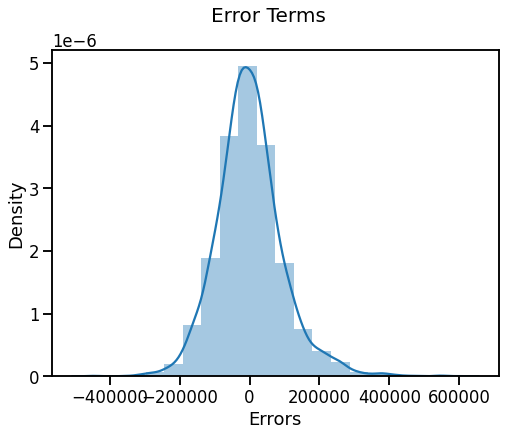

In [21]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(8,6))

preds = y_hat_test
residuals = (y_test - preds)


sns.distplot(residuals, bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                

plt.xlabel('Errors', fontsize = 18);

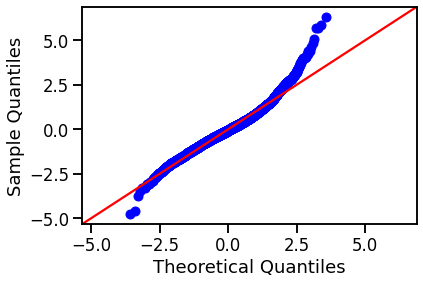

In [22]:
import scipy.stats as stats
preds = y_hat_test
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

##### Final Predictive Model Homoscedascity

The plot of the residuals confirms that the model obeys the assumption of homoscedascity for linear models.

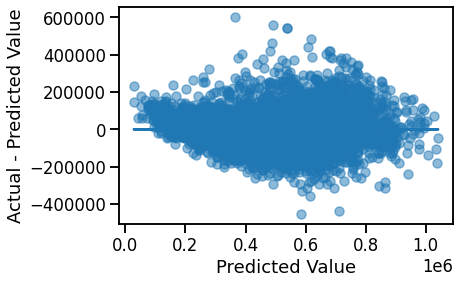

In [23]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [24]:
def VIF_calculator(X_train):

# Creating a dataframe that will contain the names of all the feature variables and their VIFs

    vif = pd.DataFrame()

    vif['Features'] = X_train.columns

    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

In [25]:
VIF_calculator(X_train)

,Features,VIF
5,grade,93.49
9,income_per_capita,49.32
7,district_grade_num,43.05
8,median_household_income,42.49
4,condition,31.03
0,bedrooms,25.87
2,sqft_living,24.74
1,bathrooms,19.05
10,health_disparity_index,8.81
15,age_at_sale,5.90


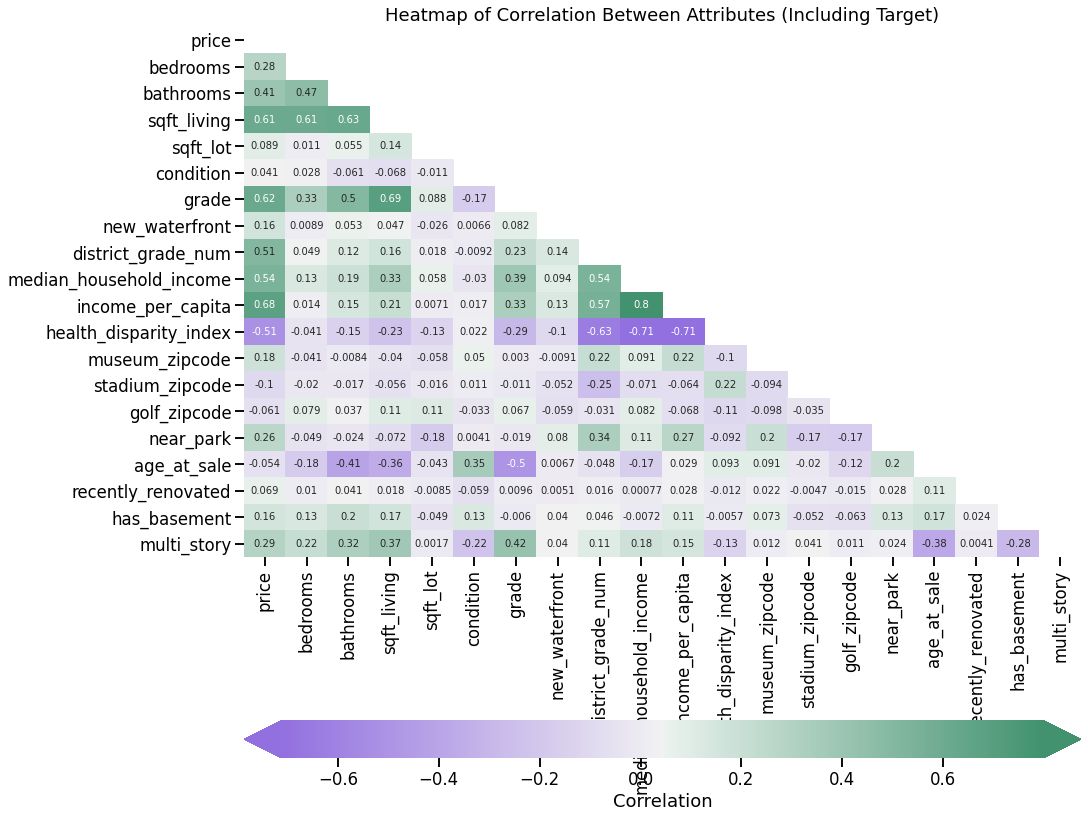

In [26]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),

    # Specifies that we should use the existing axes
    ax=ax,
    
    # Specifies that we want labels, not just colors
    annot=True,
    
    cmap = sns.diverging_palette(275, 150, l=55, as_cmap=True),
    # Customizes colorbar appearance
    
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance

# Generate a custom diverging colormap

#add title
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


#### Filtered Price Predictive Model Summary

The model was slightly overfit with the following scores:

Train Score:  0.7796727579611459
Train Mean Absolute Error: 70452.14337001787

Test Score:  0.7722599700234719
Test Mean Absolute Error: 71080.22300422823

This means that th variance in my predictive model can account for 77% of the variance in housing price. The mean absolute error value of about \\$71,000 can be used as a estimation for the percision of my predictions. The absolute value of the error seems high but that is largely due to the scale of housing prices. 

The model seems to obey all of the assumptions for linear regression other than high multicolinearity. The QQ plot revealed a right skew again, but not too dramatic. The plot of residuals for homoscedasticity did not uncover any major violations.  

##### Quick Statistical Refresher

The equation for calculating the mean absolute error is show below:
![QGIS tool to use](images/mae_equation.jpeg)

I also included a quick visualization for MAE where outputs = true values and inputs = predictions
![QGIS tool to use](images/mae_plot.jpeg)

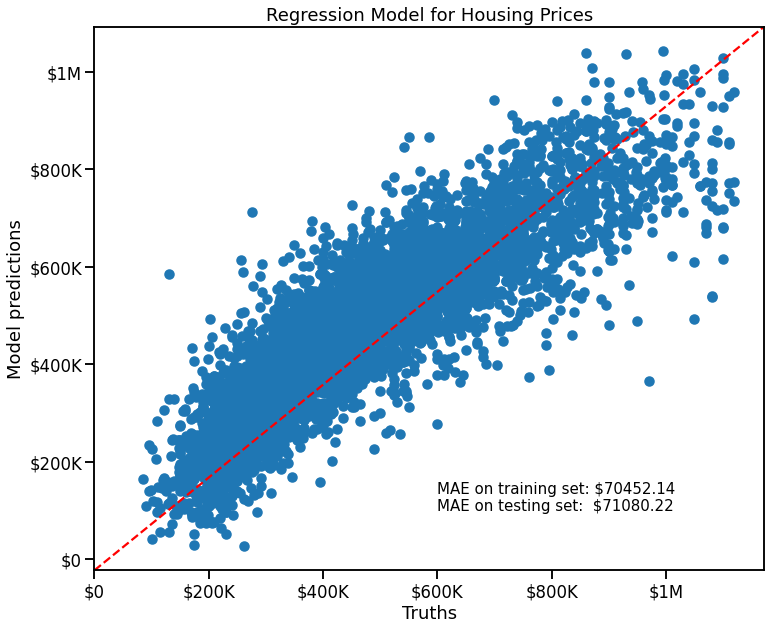

In [27]:
#create lists to make tickers easier to read
graph_xtick_plist2 = ['$0','$200K', '$400K', '$600K', '$800K', '$1M']
graph_xtick_plist = [0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6]
graph_ytick_plist2 = ['$0','$200K', '$400K', '$600K', '$800K', '$1M']
graph_ytick_plist = [0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6]
#add strings for MAEs
string_score = f'MAE on training set: ${train_mae:.2f}'
string_score += f'\nMAE on testing set:  ${test_mae:.2f}'
#initiate figure
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(y_test, y_hat_test)
#create 'perfect fit' line
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
#position text
plt.text(600000, 100000, string_score, size=15)
plt.title('Regression Model for Housing Prices')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
#change ticker displays
plt.yticks(ticks=graph_xtick_plist, labels=graph_xtick_plist2)
plt.xticks(ticks=graph_xtick_plist, labels=graph_xtick_plist2)

plt.savefig("./images/housing_price_predictions.png", dpi=150)
plt.savefig("./images/housing_price_predictions.pdf", dpi=150)
plt.show();

In [28]:
#function to take user input to run
#my final price prediction model
#just for fun
#not user friendly GUI or any
#logic to deal with poor user input


def crude_price_input():
    user_input_list = []
    print("How many bedrooms?")
    user_input_list.append(input())
    print("How many bathrooms?")
    user_input_list.append(input())
    print("How much living area (square feet)?")
    user_input_list.append(input())
    print("How large of a lot (square feet)?")
    user_input_list.append(input())
    print("Choose a condition between 1 and 5 (1 being poor and 5 being excelent)")
    user_input_list.append(input())
    print("This next choice is based on a index of construction quality for the property")
    print("1-3 has a low level of building construction and design")
    print("7 has an average level of construction and design")
    print("11-13 have a high quality level of construction and design")
    print("Please choose a desired quality of construction between 1 and 13")
    user_input_list.append(input())
    print('1 for waterfront property, 0 for no')
    user_input_list.append(input())
    print("School District Rank are as follows:")
    print("6 for C+, 7 for B-, 8 for B")
    print("9 for B+, 10 for A-, 11 for A")
    print("12 for A+. Please enter between 6 and 12")
    user_input_list.append(input())
    print("Please enter household income")
    user_input_list.append(input())
    print("Please enter individual income")
    user_input_list.append(input())
    print("Please choose between 1 and 10")
    print("for level of health risk of area")
    print("with 1 being lowest level of risk")
    user_input_list.append(input())
    print("1 to share a zipcode with a museum, 0 for no")
    user_input_list.append(input())
    print("1 to share a zipcode with a golf course, 0 for no")
    user_input_list.append(input())
    print("type 1 to be within a few miles of a highly rated park")
    print("type 0 for no")
    user_input_list.append(input())
    print("Select age of house in years")
    user_input_list.append(input())
    print("If you would like to have a house")
    print("that has been rennovated in the last decade")
    print("please press 1. Otherwise press 0")
    user_input_list.append(input())
    print("1 for basement. 0 for no")
    user_input_list.append(input())
    print('0 for one story house. 1 for mutiple floors')
    user_input_list.append(input())

    ints = [int(x) for x in user_input_list]

    ints_array = np.array(ints).reshape(1,-1)

    user_price = price_lpm.predict(ints_array)

    lower_end = round((user_price - test_mae)[0], -3)
    upper_end = round((user_price + test_mae)[0], -3)

    print("The house with all given inputs should cost:")
    print(f'Between ${lower_end} and ${upper_end}')

In [29]:
#crude_price_input()

### Interpretive Price Model

In this section I decided to carry out iterative modeling and feature elminiation with a goal to create a linear regression model to better understand individual contributions of dependent variables on housing prices. 

I started out by eliminating one of the highly correlated income features. After eliminating one, I continued with my feature elimination process, explained below. 

The process involved creating a model and eliminating features first by p_scores. I decided on an alpha value of 0.05 as the cutoff for signifcance when intepreting the p_values. After all features in the model are significant, I then started eliminating features one by one based on VIF scores and repeate the model creation process each time. This process continued until I was left with a satisficatory model. I decided to make a cutoff of 10 for my VIF scores for the interpretive models.

#### Household Income vs Individual Income (per capita)

The two variables that describe have obvious multicolinearity issues. Below I decided to test the model only including either household income or individual income but not both.

In [30]:
#drop median household to test income per capita
X_train_indv = X_train.drop('median_household_income', axis=1)
X_test_indv = X_test.drop('median_household_income', axis=1)

#drop income per capita to test household income
X_train_household = X_train.drop('income_per_capita', axis=1)
X_test_household = X_test.drop('income_per_capita', axis=1)

In [31]:
#household income summary

X_train_ph = sm.add_constant(X_train_household)

lr_ph = sm.OLS(y_train, X_train_ph).fit()

lr_ph.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2013.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:07   Log-Likelihood:            -1.7919e+05
No. Observations:               13800   AIC:                         3.584e+05
Df Residuals:                   13781   BIC:                         3.586e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -5.913e+05   1.37e+04    -43.244      0.000   -6.18e+05   -5.64e+05
bedrooms                -1.241e+04   1351.894     -9.180      0.000   -1.51e+04   -9761.164
bathrooms                1.801e+04   1887.788      9.542      0.000    1.43e+04    2.17e+04
sqft_living                95.7007      2.272     42.114      0.000      91.246     100.155
sqft_lot                    0.1466      0.025      5.963      0.000       0.098       0.195
condition                1.606e+04   1518.151     10.582      0.000    1.31e+04     1.9e+04
grade                    7.035e+04   1406.852     50.008      0.000    6.76e+04    7.31e+04
new_waterfront           3.629e+04   3321.049     10.929      0.000    2.98e+04    4.28e+04
district_grade_num        1.56e+04    662.971     23.537      0.000    1.43e+04    1.69e+04
median_household_income     0.6172      0.044     14.064      0.000       0.531       0.703
health_disparity_index  -1.185e+04    524.271    -22.598      0.000   -1.29e+04   -1.08e+04
museum_zipcode           3.917e+04   2460.195     15.923      0.000    3.44e+04     4.4e+04
stadium_zipcode          2.225e+04   2793.215      7.966      0.000    1.68e+04    2.77e+04
golf_zipcode            -3.044e+04   1893.744    -16.072      0.000   -3.41e+04   -2.67e+04
near_park                6.387e+04   2349.699     27.182      0.000    5.93e+04    6.85e+04
age_at_sale              1771.2377     41.606     42.572      0.000    1689.684    1852.791
recently_renovated       4.091e+04   8619.868      4.746      0.000     2.4e+04    5.78e+04
has_basement             1.042e+04   2167.247      4.809      0.000    6173.625    1.47e+04
multi_story              2.312e+04   2227.828     10.378      0.000    1.88e+04    2.75e+04
==============================================================================
Omnibus:                     1395.682   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2684.950
Skew:                           0.673   Prob(JB):                         0.00
Kurtosis:                       4.690   Cond. No.                     1.64e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#Household Income Model

price_lmh = LinearRegression()

# Fit the model on X_train_final and y_train
price_lmh.fit(X_train_household, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lmh.predict(X_train_household)
y_hat_test = price_lmh.predict(X_test_household)



train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lmh.score(X_train_household, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ',price_lmh.score(X_test_household, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.7244462972030903
Train Mean Absolute Error: 79511.61025019469
--------------------------------------------------
Test Score:  0.7200534800482232
Test Mean Absolute Error: 79612.86384075292


In [33]:
#Individual income model

price_lmi = LinearRegression()

# Fit the model on X_train_final and y_train
price_lmi.fit(X_train_indv, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lmi.predict(X_train_indv)
y_hat_test = price_lmi.predict(X_test_indv)


train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lmi.score(X_train_indv, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ',price_lmi.score(X_test_indv, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.7706775934886667
Train Mean Absolute Error: 71838.50325471145
--------------------------------------------------
Test Score:  0.7643560758293207
Test Mean Absolute Error: 72248.94207218653


In [34]:
#Summary for model with no household income
#Just individual estimates for income (per cap)

X_train_pi = sm.add_constant(X_train_indv)

lr_pi = sm.OLS(y_train, X_train_pi).fit()

lr_pi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2573.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:07   Log-Likelihood:            -1.7793e+05
No. Observations:               13800   AIC:                         3.559e+05
Df Residuals:                   13781   BIC:                         3.560e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.786e+05   1.24e+04    -54.893      0.000   -7.03e+05   -6.54e+05
bedrooms               -6688.8926   1237.413     -5.406      0.000   -9114.390   -4263.395
bathrooms               1.453e+04   1720.298      8.443      0.000    1.12e+04    1.79e+04
sqft_living              100.1138      2.061     48.574      0.000      96.074     104.154
sqft_lot                   0.2086      0.022      9.299      0.000       0.165       0.253
condition               1.562e+04   1384.586     11.281      0.000    1.29e+04    1.83e+04
grade                   5.645e+04   1308.484     43.139      0.000    5.39e+04     5.9e+04
new_waterfront          3.037e+04   3031.745     10.017      0.000    2.44e+04    3.63e+04
district_grade_num      1.325e+04    601.619     22.016      0.000    1.21e+04    1.44e+04
income_per_capita          4.8307      0.088     54.917      0.000       4.658       5.003
health_disparity_index   261.8266    496.031      0.528      0.598    -710.462    1234.115
museum_zipcode          2.187e+04   2267.567      9.643      0.000    1.74e+04    2.63e+04
stadium_zipcode          958.2848   2566.238      0.373      0.709   -4071.890    5988.460
golf_zipcode           -1.818e+04   1740.358    -10.445      0.000   -2.16e+04   -1.48e+04
near_park               4.549e+04   2171.714     20.945      0.000    4.12e+04    4.97e+04
age_at_sale             1350.7218     38.630     34.966      0.000    1275.002    1426.441
recently_renovated      4.459e+04   7863.769      5.670      0.000    2.92e+04       6e+04
has_basement           -1316.0127   1984.009     -0.663      0.507   -5204.940    2572.914
multi_story             1.471e+04   2036.463      7.224      0.000    1.07e+04    1.87e+04
==============================================================================
Omnibus:                     1373.255   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3056.409
Skew:                           0.619   Prob(JB):                         0.00
Kurtosis:                       4.944   Cond. No.                     8.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summary of Findings


I decided that my model is better fit when keeping income per capita compared to household income. In the future with more time I would like to build a model up from household income. For now, I will proceed with eliminating it from my model to begin my feature elimination process. 

### Model Iteration, Unscaled

I decided to keep income per capita and drop household income. I decided to try iterative modeling with scaled data compared to unscaled data. I want to first remove features by p value and then by VIF score. I am starting with unscaled data.

I also decided to remove the lot square footage as a predictor because the distrubtion of the original lot area data was far from being normal. Interepreting the coefficient for the area of the lot would be very dificult because of the extreme tail on the distrubtion of housing lot sizes. 

In [35]:
#remove sqft_lot for reasons stated earlier
#remove has_basement: high p_value

X_train_indv2 = X_train_indv.drop(['has_basement', 'sqft_lot'], axis=1)

X_train_pi2 = sm.add_constant(X_train_indv2)

lr_pi = sm.OLS(y_train, X_train_pi2).fit()

display(lr_pi.summary())

VIF_calculator(X_train_indv2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     2871.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:07   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13783   BIC:                         3.561e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.691e+05   1.24e+04    -54.154      0.000   -6.93e+05   -6.45e+05
bedrooms               -7781.1721   1235.627     -6.297      0.000   -1.02e+04   -5359.175
bathrooms               1.423e+04   1685.411      8.442      0.000    1.09e+04    1.75e+04
sqft_living              102.2763      2.014     50.781      0.000      98.328     106.224
condition               1.543e+04   1388.721     11.109      0.000    1.27e+04    1.81e+04
grade                   5.653e+04   1308.319     43.207      0.000     5.4e+04    5.91e+04
new_waterfront          2.963e+04   3039.545      9.747      0.000    2.37e+04    3.56e+04
district_grade_num      1.327e+04    603.375     21.992      0.000    1.21e+04    1.45e+04
income_per_capita          4.7648      0.088     54.393      0.000       4.593       4.937
health_disparity_index  -290.8479    493.344     -0.590      0.556   -1257.869     676.173
museum_zipcode          2.142e+04   2272.237      9.425      0.000     1.7e+04    2.59e+04
stadium_zipcode         1089.7514   2573.975      0.423      0.672   -3955.590    6135.093
golf_zipcode           -1.734e+04   1742.687     -9.949      0.000   -2.08e+04   -1.39e+04
near_park               4.265e+04   2149.399     19.843      0.000    3.84e+04    4.69e+04
age_at_sale             1366.0828     38.433     35.544      0.000    1290.748    1441.417
recently_renovated      4.373e+04   7887.155      5.544      0.000    2.83e+04    5.92e+04
multi_story             1.462e+04   1904.234      7.678      0.000    1.09e+04    1.84e+04
==============================================================================
Omnibus:                     1412.333   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3095.154
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       4.936   Cond. No.                     7.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Features,VIF
4,grade,91.24
6,district_grade_num,41.39
3,condition,30.86
7,income_per_capita,29.26
0,bedrooms,25.42
2,sqft_living,23.15
1,bathrooms,18.10
8,health_disparity_index,8.52
13,age_at_sale,5.66
12,near_park,4.92


In [36]:
#drop stadium_zipcode (high p_value)
#retry model

X_train_indv3 = X_train_indv2.drop('stadium_zipcode', axis=1)

X_train_pi3 = sm.add_constant(X_train_indv3)

lr_pi = sm.OLS(y_train, X_train_pi3).fit()

lr_pi.summary()

VIF_calculator(X_train_indv3)

,Features,VIF
4,grade,91.19
6,district_grade_num,40.56
3,condition,30.85
7,income_per_capita,28.17
0,bedrooms,25.41
2,sqft_living,23.05
1,bathrooms,18.10
8,health_disparity_index,8.13
12,age_at_sale,5.65
11,near_park,4.82


In [37]:
#drop health disparity index (high p_value)
#retry model


X_train_indv4 = X_train_indv3.drop('health_disparity_index', axis=1)

X_train_pi4 = sm.add_constant(X_train_indv4)

lr_pi4 = sm.OLS(y_train, X_train_pi4).fit()

lr_pi4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3282.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:08   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13785   BIC:                         3.561e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.725e+05   1.05e+04    -64.000      0.000   -6.93e+05   -6.52e+05
bedrooms           -7798.4792   1234.495     -6.317      0.000   -1.02e+04   -5378.700
bathrooms           1.422e+04   1684.928      8.438      0.000    1.09e+04    1.75e+04
sqft_living          102.2822      2.004     51.028      0.000      98.353     106.211
condition           1.544e+04   1388.155     11.120      0.000    1.27e+04    1.82e+04
grade               5.651e+04   1305.471     43.288      0.000     5.4e+04    5.91e+04
new_waterfront      2.958e+04   3037.867      9.738      0.000    2.36e+04    3.55e+04
district_grade_num  1.338e+04    538.271     24.851      0.000    1.23e+04    1.44e+04
income_per_capita      4.7974      0.070     68.073      0.000       4.659       4.936
museum_zipcode      2.124e+04   2256.714      9.412      0.000    1.68e+04    2.57e+04
golf_zipcode       -1.718e+04   1710.843    -10.042      0.000   -2.05e+04   -1.38e+04
near_park           4.229e+04   2081.965     20.315      0.000    3.82e+04    4.64e+04
age_at_sale         1364.4973     38.338     35.591      0.000    1289.349    1439.646
recently_renovated  4.376e+04   7886.590      5.548      0.000    2.83e+04    5.92e+04
multi_story         1.467e+04   1899.705      7.722      0.000    1.09e+04    1.84e+04
==============================================================================
Omnibus:                     1414.313   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3101.871
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       4.938   Cond. No.                     6.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Check performance of model before eliminating more
#features with high VIF scores

X_test4 = X_test_indv.drop(columns=['health_disparity_index',
                              'stadium_zipcode',
                              'has_basement', 'sqft_lot'])

price_lmi = LinearRegression()

# Fit the model on X_train_final and y_train
price_lmi.fit(X_train_indv4, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lmi.predict(X_train_indv4)
y_hat_test = price_lmi.predict(X_test4)


train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lmi.score(X_train_indv4, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ',price_lmi.score(X_test4, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.769205311421599
Train Mean Absolute Error: 72084.41804317545
--------------------------------------------------
Test Score:  0.7635962953018491
Test Mean Absolute Error: 72374.93529935951


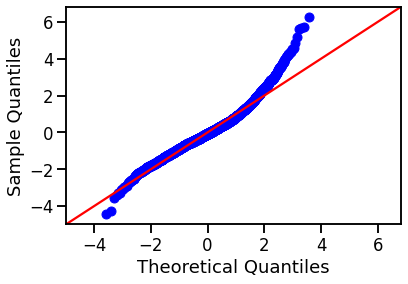

In [39]:
preds = y_hat_test
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

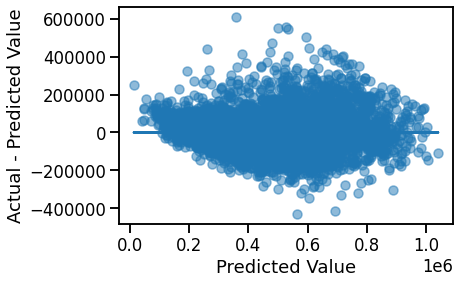

In [40]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [41]:
VIF_calculator(X_train_indv4)

,Features,VIF
4,grade,63.14
6,district_grade_num,37.77
3,condition,29.39
0,bedrooms,24.66
2,sqft_living,21.07
7,income_per_capita,19.11
1,bathrooms,18.00
11,age_at_sale,5.32
10,near_park,4.68
13,multi_story,2.59


In [42]:
X_train_indv5 = X_train_indv4.drop('grade', axis=1)

X_train_pi5 = sm.add_constant(X_train_indv5)

lr_pi5 = sm.OLS(y_train, X_train_pi5).fit()

display(lr_pi5.summary())

VIF_calculator(X_train_indv5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     2985.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:08   Log-Likelihood:            -1.7885e+05
No. Observations:               13800   AIC:                         3.577e+05
Df Residuals:                   13786   BIC:                         3.578e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.314e+05   7407.962    -44.734      0.000   -3.46e+05   -3.17e+05
bedrooms           -1.378e+04   1307.415    -10.539      0.000   -1.63e+04   -1.12e+04
bathrooms           1.563e+04   1795.398      8.704      0.000    1.21e+04    1.91e+04
sqft_living          146.4543      1.839     79.652      0.000     142.850     150.058
condition           1.402e+04   1479.035      9.481      0.000    1.11e+04    1.69e+04
new_waterfront      3.506e+04   3234.833     10.839      0.000    2.87e+04    4.14e+04
district_grade_num  1.326e+04    573.662     23.123      0.000    1.21e+04    1.44e+04
income_per_capita      5.5416      0.073     76.079      0.000       5.399       5.684
museum_zipcode      2.129e+04   2405.120      8.852      0.000    1.66e+04     2.6e+04
golf_zipcode       -1.743e+04   1823.342     -9.560      0.000    -2.1e+04   -1.39e+04
near_park           4.442e+04   2218.264     20.025      0.000    4.01e+04    4.88e+04
age_at_sale          815.5753     38.560     21.151      0.000     739.993     891.158
recently_renovated  5.556e+04   8400.209      6.614      0.000    3.91e+04     7.2e+04
multi_story         2.444e+04   2010.288     12.158      0.000    2.05e+04    2.84e+04
==============================================================================
Omnibus:                     1243.764   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2612.457
Skew:                           0.586   Prob(JB):                         0.00
Kurtosis:                       4.781   Cond. No.                     4.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Features,VIF
5,district_grade_num,33.18
0,bedrooms,24.25
3,condition,24.10
2,sqft_living,18.91
6,income_per_capita,18.45
1,bathrooms,17.58
10,age_at_sale,5.24
9,near_park,4.68
12,multi_story,2.51
8,golf_zipcode,1.80


In [43]:
#vif score elimination 

X_train_indv6 = X_train_indv5.drop('district_grade_num', axis=1)

X_train_pi6 = sm.add_constant(X_train_indv6)

lr_pi6 = sm.OLS(y_train, X_train_pi6).fit()

display(lr_pi6.summary())

VIF_calculator(X_train_indv6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3070.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:08   Log-Likelihood:            -1.7911e+05
No. Observations:               13800   AIC:                         3.582e+05
Df Residuals:                   13787   BIC:                         3.583e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.547e+05   6751.488    -37.727      0.000   -2.68e+05   -2.41e+05
bedrooms           -1.304e+04   1332.085     -9.791      0.000   -1.57e+04   -1.04e+04
bathrooms           1.451e+04   1829.154      7.932      0.000    1.09e+04    1.81e+04
sqft_living          148.0200      1.873     79.043      0.000     144.349     151.691
condition           1.458e+04   1507.191      9.673      0.000    1.16e+04    1.75e+04
new_waterfront      4.064e+04   3287.671     12.361      0.000    3.42e+04    4.71e+04
income_per_capita      6.3545      0.065     97.738      0.000       6.227       6.482
museum_zipcode      2.704e+04   2438.084     11.091      0.000    2.23e+04    3.18e+04
golf_zipcode       -1.572e+04   1856.775     -8.468      0.000   -1.94e+04   -1.21e+04
near_park           5.699e+04   2191.862     26.000      0.000    5.27e+04    6.13e+04
age_at_sale          709.8426     39.022     18.191      0.000     633.354     786.331
recently_renovated  5.742e+04   8560.853      6.708      0.000    4.06e+04    7.42e+04
multi_story         2.278e+04   2047.512     11.124      0.000    1.88e+04    2.68e+04
==============================================================================
Omnibus:                     1088.801   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.652
Skew:                           0.544   Prob(JB):                         0.00
Kurtosis:                       4.589   Cond. No.                     4.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Features,VIF
0,bedrooms,23.58
3,condition,21.20
2,sqft_living,18.91
1,bathrooms,17.50
5,income_per_capita,12.75
9,age_at_sale,5.22
8,near_park,4.32
11,multi_story,2.51
7,golf_zipcode,1.78
6,museum_zipcode,1.32


In [44]:
#VIF score elimination
X_train_indv7 = X_train_indv6.drop('condition', axis=1)

X_train_pi7 = sm.add_constant(X_train_indv7)

lr_pi7 = sm.OLS(y_train, X_train_pi7).fit()

display(lr_pi7.summary())

VIF_calculator(X_train_indv7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     3318.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:08   Log-Likelihood:            -1.7916e+05
No. Observations:               13800   AIC:                         3.583e+05
Df Residuals:                   13788   BIC:                         3.584e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.144e+05   5329.166    -40.231      0.000   -2.25e+05   -2.04e+05
bedrooms           -1.223e+04   1333.908     -9.171      0.000   -1.48e+04   -9618.056
bathrooms           1.587e+04   1829.856      8.672      0.000    1.23e+04    1.95e+04
sqft_living          148.0914      1.879     78.817      0.000     144.408     151.774
new_waterfront      4.086e+04   3298.610     12.386      0.000    3.44e+04    4.73e+04
income_per_capita      6.3696      0.065     97.670      0.000       6.242       6.497
museum_zipcode      2.785e+04   2444.820     11.391      0.000    2.31e+04    3.26e+04
golf_zipcode       -1.585e+04   1862.948     -8.510      0.000   -1.95e+04   -1.22e+04
near_park           5.538e+04   2192.864     25.255      0.000    5.11e+04    5.97e+04
age_at_sale          833.6803     36.985     22.541      0.000     761.184     906.177
recently_renovated  4.827e+04   8536.851      5.654      0.000    3.15e+04     6.5e+04
multi_story         2.038e+04   2039.290      9.994      0.000    1.64e+04    2.44e+04
==============================================================================
Omnibus:                     1042.573   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.332
Skew:                           0.523   Prob(JB):                         0.00
Kurtosis:                       4.574   Cond. No.                     4.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Features,VIF
0,bedrooms,20.86
2,sqft_living,18.87
1,bathrooms,16.36
4,income_per_capita,11.66
7,near_park,4.32
8,age_at_sale,3.89
10,multi_story,2.50
6,golf_zipcode,1.76
5,museum_zipcode,1.32
3,new_waterfront,1.12


In [45]:
#VIF score elimination
X_train_indv8 = X_train_indv7.drop(['bedrooms','bathrooms'], axis=1)

X_train_pi8 = sm.add_constant(X_train_indv8)

lr_pi8 = sm.OLS(y_train, X_train_pi8).fit()

display(lr_pi8.summary())

VIF_calculator(X_train_indv8)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     4001.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:08   Log-Likelihood:            -1.7923e+05
No. Observations:               13800   AIC:                         3.585e+05
Df Residuals:                   13790   BIC:                         3.585e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.211e+05   4320.023    -51.171      0.000    -2.3e+05   -2.13e+05
sqft_living          146.3155      1.415    103.394      0.000     143.542     149.089
new_waterfront      4.188e+04   3313.197     12.640      0.000    3.54e+04    4.84e+04
income_per_capita      6.4728      0.065    100.062      0.000       6.346       6.600
museum_zipcode      2.816e+04   2456.111     11.463      0.000    2.33e+04     3.3e+04
golf_zipcode       -1.683e+04   1869.692     -9.002      0.000   -2.05e+04   -1.32e+04
near_park           5.583e+04   2200.322     25.372      0.000    5.15e+04    6.01e+04
age_at_sale          731.0778     35.818     20.411      0.000     660.870     801.285
recently_renovated  5.393e+04   8556.481      6.303      0.000    3.72e+04    7.07e+04
multi_story         2.082e+04   2047.018     10.173      0.000    1.68e+04    2.48e+04
==============================================================================
Omnibus:                     1075.279   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2102.018
Skew:                           0.538   Prob(JB):                         0.00
Kurtosis:                       4.580   Cond. No.                     4.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Features,VIF
2,income_per_capita,11.03
0,sqft_living,7.77
5,near_park,4.22
6,age_at_sale,3.37
8,multi_story,2.48
4,golf_zipcode,1.72
3,museum_zipcode,1.32
1,new_waterfront,1.12
7,recently_renovated,1.02


In [46]:
X_test_indv8 = X_test4.drop(columns=['bedrooms', 'bathrooms', 
                                       'condition', 'grade',
                                        'district_grade_num'])

In [47]:
price_lmi = LinearRegression()

# Fit the model on X_train_final and y_train
price_lmi.fit(X_train_indv8, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lmi.predict(X_train_indv8)
y_hat_test = price_lmi.predict(X_test_indv8)


train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lmi.score(X_train_indv8, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ',price_lmi.score(X_test_indv8, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.7231071751779209
Train Mean Absolute Error: 79383.95693472768
--------------------------------------------------
Test Score:  0.7181326942515609
Test Mean Absolute Error: 79248.99238828976


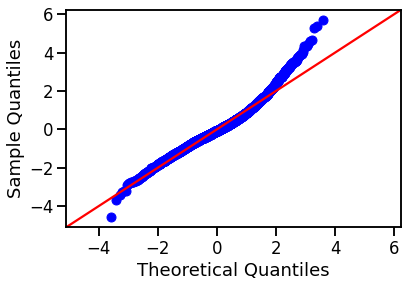

In [48]:
preds = y_hat_test
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

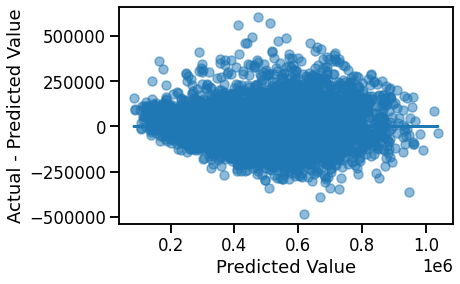

In [49]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

##### Unscaled Interpretive Model Summary

Train Score:  0.7231071751779209
Train Mean Absolute Error: 79383.95693472768

Test Score:  0.7181326942515609
Test Mean Absolute Error: 79248.99238828976

The model seems to obey all of the assumptions of multiple linear regression within an acceptable margin. The residuals plot hints at acceptable homoscedasticity. There is still a right skew on the distribution of residuals. The VIF scores are way closer to being within an acceptable level. The model is overfit. The R Squared values decreased from the predictive model, but were still pretty decent (0.72 for test data). The MAE also increased compared to the predictive model, but, relatively speaking, not by much.  However, the condition level of the model is still very high and I ended up removing some features I would rather keep in order to try and improve my VIF scores. I will attempt this process again with filtered data and see if that will improve the model.

#### Modeling With Scaled Data

I have decided to attemp my predictive model iteration process again, but this time first scaling my continuous data before any feature elimination. I decided to scale the data with Min-Max scaling. 

[min_max_scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [50]:
X_train_indv.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition',
       'grade', 'new_waterfront', 'district_grade_num', 'income_per_capita',
       'health_disparity_index', 'museum_zipcode', 'stadium_zipcode',
       'golf_zipcode', 'near_park', 'age_at_sale', 'recently_renovated',
       'has_basement', 'multi_story'],
      dtype='object')

In [51]:
X_cont = ['bedrooms', 'bathrooms', 'sqft_living', 
           'condition', 'grade',
          'age_at_sale', 'district_grade_num',
          'income_per_capita', 'health_disparity_index']

In [52]:
X_train_s = X_train_indv.drop('sqft_lot', axis=1)
X_test_s = X_test_indv.drop('sqft_lot', axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_s[X_cont] = scaler.fit_transform(X_train_s[X_cont])

X_test_s[X_cont] = scaler.fit_transform(X_test_s[X_cont])

In [53]:
X_train_sc = sm.add_constant(X_train_s)

lr_s = sm.OLS(y_train, X_train_sc).fit()

lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     2702.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13782   BIC:                         3.561e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -2.52e+05   7110.024    -35.444      0.000   -2.66e+05   -2.38e+05
bedrooms               -4.671e+04   7413.632     -6.300      0.000   -6.12e+04   -3.22e+04
bathrooms               8.813e+04   1.04e+04      8.513      0.000    6.78e+04    1.08e+05
sqft_living             3.955e+05   7884.640     50.166      0.000     3.8e+05    4.11e+05
condition               6.177e+04   5554.961     11.119      0.000    5.09e+04    7.27e+04
grade                   4.512e+05   1.05e+04     42.969      0.000    4.31e+05    4.72e+05
new_waterfront          2.972e+04   3040.320      9.774      0.000    2.38e+04    3.57e+04
district_grade_num      7.953e+04   3620.886     21.964      0.000    7.24e+04    8.66e+04
income_per_capita       3.847e+05   7090.884     54.247      0.000    3.71e+05    3.99e+05
health_disparity_index -2235.7184   4450.619     -0.502      0.615    -1.1e+04    6488.101
museum_zipcode          2.154e+04   2274.314      9.471      0.000    1.71e+04     2.6e+04
stadium_zipcode         1045.9128   2574.166      0.406      0.685   -3999.802    6091.628
golf_zipcode           -1.742e+04   1743.813     -9.988      0.000   -2.08e+04    -1.4e+04
near_park               4.293e+04   2160.889     19.866      0.000    3.87e+04    4.72e+04
age_at_sale             1.591e+05   4487.344     35.455      0.000     1.5e+05    1.68e+05
recently_renovated      4.362e+04   7887.432      5.531      0.000    2.82e+04    5.91e+04
has_basement           -2469.6442   1986.257     -1.243      0.214   -6362.978    1423.689
multi_story             1.371e+04   2039.912      6.721      0.000    9712.082    1.77e+04
==============================================================================
Omnibus:                     1413.103   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3100.718
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       4.939   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#eliminate highest p_value feature

X_train_s2 = X_train_s.drop('stadium_zipcode', axis=1)

X_train_sc2 = sm.add_constant(X_train_s2)

lr_s2 = sm.OLS(y_train, X_train_sc2).fit()

lr_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     2872.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13783   BIC:                         3.561e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.521e+05   7106.078    -35.477      0.000   -2.66e+05   -2.38e+05
bedrooms               -4.666e+04   7412.651     -6.295      0.000   -6.12e+04   -3.21e+04
bathrooms               8.818e+04   1.04e+04      8.518      0.000    6.79e+04    1.08e+05
sqft_living             3.953e+05   7865.820     50.258      0.000     3.8e+05    4.11e+05
condition               6.182e+04   5553.063     11.133      0.000    5.09e+04    7.27e+04
grade                   4.513e+05   1.05e+04     43.008      0.000    4.31e+05    4.72e+05
new_waterfront          2.968e+04   3038.773      9.767      0.000    2.37e+04    3.56e+04
district_grade_num      7.936e+04   3597.278     22.062      0.000    7.23e+04    8.64e+04
income_per_capita       3.852e+05   6955.235     55.386      0.000    3.72e+05    3.99e+05
health_disparity_index -1876.5473   4361.816     -0.430      0.667   -1.04e+04    6673.205
museum_zipcode          2.147e+04   2268.554      9.466      0.000     1.7e+04    2.59e+04
golf_zipcode           -1.743e+04   1743.487     -9.997      0.000   -2.08e+04    -1.4e+04
near_park                4.28e+04   2137.562     20.022      0.000    3.86e+04     4.7e+04
age_at_sale             1.591e+05   4486.820     35.454      0.000     1.5e+05    1.68e+05
recently_renovated      4.363e+04   7887.158      5.532      0.000    2.82e+04    5.91e+04
has_basement           -2480.6981   1986.010     -1.249      0.212   -6373.548    1412.152
multi_story             1.376e+04   2036.369      6.757      0.000    9767.427    1.78e+04
==============================================================================
Omnibus:                     1415.822   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3107.736
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       4.940   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#eliminate highest p_value feature

X_train_s3 = X_train_s2.drop('health_disparity_index', axis=1)

X_train_sc3 = sm.add_constant(X_train_s3)

lr_s3 = sm.OLS(y_train, X_train_sc3).fit()

lr_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3063.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13784   BIC:                         3.561e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.538e+05   5840.636    -43.462      0.000   -2.65e+05   -2.42e+05
bedrooms           -4.679e+04   7406.800     -6.317      0.000   -6.13e+04   -3.23e+04
bathrooms           8.816e+04   1.04e+04      8.516      0.000    6.79e+04    1.08e+05
sqft_living         3.956e+05   7842.651     50.439      0.000     3.8e+05    4.11e+05
condition            6.18e+04   5552.691     11.130      0.000    5.09e+04    7.27e+04
grade               4.511e+05   1.05e+04     43.062      0.000    4.31e+05    4.72e+05
new_waterfront      2.968e+04   3038.676      9.766      0.000    2.37e+04    3.56e+04
district_grade_num  8.004e+04   3234.175     24.748      0.000    7.37e+04    8.64e+04
income_per_capita   3.869e+05   5691.596     67.985      0.000    3.76e+05    3.98e+05
museum_zipcode      2.139e+04   2259.554      9.465      0.000     1.7e+04    2.58e+04
golf_zipcode       -1.729e+04   1712.931    -10.094      0.000   -2.06e+04   -1.39e+04
near_park           4.262e+04   2097.561     20.320      0.000    3.85e+04    4.67e+04
age_at_sale          1.59e+05   4478.734     35.493      0.000     1.5e+05    1.68e+05
recently_renovated  4.365e+04   7886.867      5.534      0.000    2.82e+04    5.91e+04
has_basement       -2538.4988   1981.402     -1.281      0.200   -6422.317    1345.319
multi_story         1.373e+04   2035.383      6.747      0.000    9742.950    1.77e+04
==============================================================================
Omnibus:                     1415.172   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3107.495
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       4.941   Cond. No.                         30.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#eliminate highest p_value feature

X_train_s4 = X_train_s3.drop('has_basement', axis=1)

X_train_sc4 = sm.add_constant(X_train_s4)

lr_s4 = sm.OLS(y_train, X_train_sc4).fit()

display(lr_s4.summary())

#display VIF scores
VIF_calculator(X_train_s4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     3282.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7797e+05
No. Observations:               13800   AIC:                         3.560e+05
Df Residuals:                   13785   BIC:                         3.561e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.534e+05   5829.899    -43.463      0.000   -2.65e+05   -2.42e+05
bedrooms           -4.679e+04   7406.972     -6.317      0.000   -6.13e+04   -3.23e+04
bathrooms           8.531e+04   1.01e+04      8.438      0.000    6.55e+04    1.05e+05
sqft_living         3.938e+05   7717.011     51.028      0.000    3.79e+05    4.09e+05
condition           6.174e+04   5552.621     11.120      0.000    5.09e+04    7.26e+04
grade               4.521e+05   1.04e+04     43.288      0.000    4.32e+05    4.73e+05
new_waterfront      2.958e+04   3037.867      9.738      0.000    2.36e+04    3.55e+04
district_grade_num  8.026e+04   3229.624     24.851      0.000    7.39e+04    8.66e+04
income_per_capita   3.864e+05   5676.367     68.073      0.000    3.75e+05    3.98e+05
museum_zipcode      2.124e+04   2256.714      9.412      0.000    1.68e+04    2.57e+04
golf_zipcode       -1.718e+04   1710.843    -10.042      0.000   -2.05e+04   -1.38e+04
near_park           4.229e+04   2081.965     20.315      0.000    3.82e+04    4.64e+04
age_at_sale         1.583e+05   4447.263     35.591      0.000     1.5e+05    1.67e+05
recently_renovated  4.376e+04   7886.590      5.548      0.000    2.83e+04    5.92e+04
multi_story         1.467e+04   1899.705      7.722      0.000    1.09e+04    1.84e+04
==============================================================================
Omnibus:                     1414.313   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3101.871
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       4.938   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,grade,23.91
1,bathrooms,16.56
2,sqft_living,16.20
3,condition,14.18
0,bedrooms,13.09
7,income_per_capita,10.75
6,district_grade_num,7.26
11,age_at_sale,5.28
10,near_park,4.61
13,multi_story,2.57


In [57]:
#eliminate highest VIF score

X_train_s5 = X_train_s4.drop('grade', axis=1)

X_train_sc5 = sm.add_constant(X_train_s5)

lr_s5 = sm.OLS(y_train, X_train_sc5).fit()

display(lr_s5.summary())

#display VIF scores
VIF_calculator(X_train_s5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     2985.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7885e+05
No. Observations:               13800   AIC:                         3.577e+05
Df Residuals:                   13786   BIC:                         3.578e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.188e+05   5255.603    -22.600      0.000   -1.29e+05   -1.08e+05
bedrooms           -8.267e+04   7844.492    -10.539      0.000    -9.8e+04   -6.73e+04
bathrooms           9.376e+04   1.08e+04      8.704      0.000    7.26e+04    1.15e+05
sqft_living         5.638e+05   7078.932     79.652      0.000     5.5e+05    5.78e+05
condition           5.609e+04   5916.140      9.481      0.000    4.45e+04    6.77e+04
new_waterfront      3.506e+04   3234.833     10.839      0.000    2.87e+04    4.14e+04
district_grade_num  7.959e+04   3441.973     23.123      0.000    7.28e+04    8.63e+04
income_per_capita   4.463e+05   5866.906     76.079      0.000    4.35e+05    4.58e+05
museum_zipcode      2.129e+04   2405.120      8.852      0.000    1.66e+04     2.6e+04
golf_zipcode       -1.743e+04   1823.342     -9.560      0.000    -2.1e+04   -1.39e+04
near_park           4.442e+04   2218.264     20.025      0.000    4.01e+04    4.88e+04
age_at_sale         9.461e+04   4472.952     21.151      0.000    8.58e+04    1.03e+05
recently_renovated  5.556e+04   8400.209      6.614      0.000    3.91e+04     7.2e+04
multi_story         2.444e+04   2010.288     12.158      0.000    2.05e+04    2.84e+04
==============================================================================
Omnibus:                     1243.764   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2612.457
Skew:                           0.586   Prob(JB):                         0.00
Kurtosis:                       4.781   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
1,bathrooms,15.73
2,sqft_living,13.23
0,bedrooms,13.09
3,condition,13.04
6,income_per_capita,9.88
5,district_grade_num,7.25
10,age_at_sale,5.14
9,near_park,4.56
12,multi_story,2.49
8,golf_zipcode,1.75


In [58]:
#eliminate highest VIF scores

X_train_s6 = X_train_s5.drop(['bathrooms', 'bedrooms', 'condition'], axis=1)

X_train_sc6 = sm.add_constant(X_train_s6)

lr_s6 = sm.OLS(y_train, X_train_sc6).fit()

display(lr_s6.summary())

#display VIF scores
VIF_calculator(X_train_s6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3787.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:09   Log-Likelihood:            -1.7897e+05
No. Observations:               13800   AIC:                         3.580e+05
Df Residuals:                   13789   BIC:                         3.581e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -8.6e+04   3678.923    -23.376      0.000   -9.32e+04   -7.88e+04
sqft_living         5.571e+05   5356.839    103.990      0.000    5.47e+05    5.68e+05
new_waterfront      3.642e+04   3262.157     11.166      0.000       3e+04    4.28e+04
district_grade_num  7.866e+04   3470.434     22.665      0.000    7.19e+04    8.55e+04
income_per_capita   4.571e+05   5848.767     78.156      0.000    4.46e+05    4.69e+05
museum_zipcode      2.246e+04   2424.736      9.263      0.000    1.77e+04    2.72e+04
golf_zipcode       -1.858e+04   1837.489    -10.109      0.000   -2.22e+04    -1.5e+04
near_park            4.35e+04   2227.955     19.523      0.000    3.91e+04    4.79e+04
age_at_sale         9.561e+04   4107.450     23.277      0.000    8.76e+04    1.04e+05
recently_renovated   5.28e+04   8401.868      6.285      0.000    3.63e+04    6.93e+04
multi_story         2.259e+04   2011.505     11.231      0.000    1.86e+04    2.65e+04
==============================================================================
Omnibus:                     1235.306   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2591.505
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       4.775   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,income_per_capita,9.49
2,district_grade_num,7.17
0,sqft_living,5.52
6,near_park,4.43
7,age_at_sale,3.16
9,multi_story,2.43
5,golf_zipcode,1.69
4,museum_zipcode,1.34
1,new_waterfront,1.12
8,recently_renovated,1.02


In [59]:
X_test_ifinal = X_test_s.drop(columns=['bedrooms', 'bathrooms', 
                                  'condition', 'grade',
                                 'has_basement', 'has_basement',
                                 'health_disparity_index',
                                  'stadium_zipcode'])

X_train_ifinal = X_train_s6

In [60]:
price_lmis = LinearRegression()

# Fit the model on X_train_final and y_train
price_lmis.fit(X_train_ifinal, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train = price_lmis.predict(X_train_ifinal)
y_hat_test = price_lmis.predict(X_test_ifinal)


train_mae = mean_absolute_error(y_train, y_hat_train)
test_mae = mean_absolute_error(y_test, y_hat_test)

print('Train Score: ',price_lmis.score(X_train_ifinal, y_train))
print('Train Mean Absolute Error:', train_mae)

print('--------------------------------------------------')

print('Test Score: ',price_lmis.score(X_test_ifinal, y_test))
print('Test Mean Absolute Error:', test_mae)

Train Score:  0.7330522611954744
Train Mean Absolute Error: 77618.06895051948
--------------------------------------------------
Test Score:  0.7092551034195105
Test Mean Absolute Error: 80050.90880042624


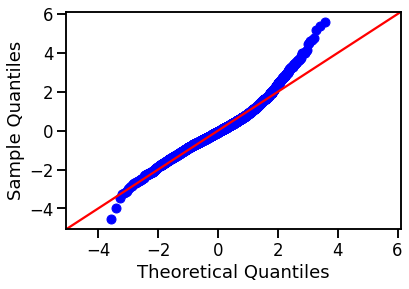

In [61]:
preds = y_hat_test
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

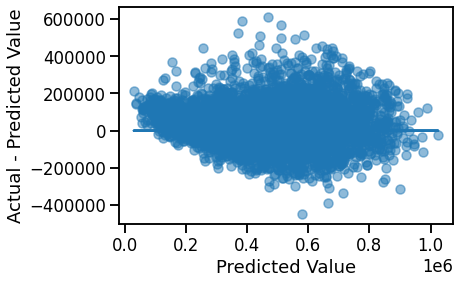

In [62]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

#### Final Price Interpretive Model Performance Summary

Scaled Train Score:  0.7330522611954744
Scaled Train Mean Absolute Error: 77618.06895051948

Scaled Test Score:  0.7092551034195105
Scaled Test Mean Absolute Error: 80050.90880042624

Unscaled Train Score:  0.7231071751779209
Unscaled Train Mean Absolute Error: 79383.95693472768

Unscaled Test Score:  0.7181326942515609
Unscaled Test Mean Absolute Error: 79248.99238828976

My unscaled model is much more overfit than my unscaled model. The scaled model can explain about 71% of the variance in the test data as compared to 73% of the training data and 72% in the unscaled testing model. As usual there is a skew in the distrubtion of the preds, although not super dramatic. The scatter plot of residuals seem to indicate homoscedasticity. All of the VIF scores have fallen within my acceptable range for multicolinearity. 
 
Looking at just the scores and errors, it would seem the the unscaled model performs better and is clearly less overfit than the scaled data. However, the model with the scaled data has a dramatically lower condition score and much less multicolinearity issues. It also contains more interesting features and lower standard errors for each coefficient, which is what I really care about for an interpretive model.

I decided to select the scaled model as my final intreptive model because of the lesser impact of multicolinearity when intepreting coeeficients. I also believe it to be more interesting when trying to answer my buisness problem.

## Price Target Interpretive Model Results

Below is my code to create a nice looking dataframe for all of my error results and coefficient of determination values. After that is my full intepretation of the model and a visualization of the affects that each of my dependent varaibles has on the price of housing in King County, Washington. 

In [63]:
#this line of code shows all of
#the methods that can be called
#on my statsmodel OLS instance

#dir(lr_s6)

In [64]:
#create a dataframe for the 95%
#confidence interval for all dependent
#variable coefficients 

conf_df = lr_s6.conf_int(alpha=0.05)
# conf_df.rename(columns={0: 'lower', 1: 'upper'}, inplace=True)

#create a series to add 
#standard error to the
#confidence error DataFrame

se_s = lr_s6.bse
#will transpose later to 
#to turn current column names
#into my future index
se_s.rename(2, inplace=True)

#join 
error_df = conf_df.join(se_s)
#inspect
error_df

,0,1,2
const,-93211.455559,-78789.078237,3678.922540
sqft_living,546555.247030,567555.512379,5356.838739
new_waterfront,30029.547396,42818.088909,3262.156618
district_grade_num,71855.182718,85460.226503,3470.433558
income_per_capita,445649.607180,468578.365988,5848.767212
museum_zipcode,17708.622908,27214.248015,2424.736067
golf_zipcode,-22177.291845,-14973.835948,1837.488763
near_park,39130.200186,47864.389789,2227.954954
age_at_sale,87556.057002,103658.378065,4107.449874
recently_renovated,36335.138841,69272.746147,8401.867684


In [65]:
#list of features to descale
cont_2 = ['sqft_living','age_at_sale', 
       'district_grade_num', 'income_per_capita']


#denominator for converting back to original units
descale_denom = X_train[cont_2].max() - X_train[cont_2].min()

#model coeffs of features that were transformed
#now in their original units
model_coeffs = lr_s6.params[cont_2]/descale_denom


#convert transformed values back into
#original units for easier
#interpretation

error_df_descaled = (error_df.T[cont_2]/descale_denom)

#transpose rows and columns
#and drop old columns that
#have the unscaled values

error_df = error_df.transpose().drop(columns=cont_2)


#join descaled features back into original 
#descriptive error dataframe

error_df2 = error_df.join(error_df_descaled)

#reshape dataframe for easier join
error_df2 = error_df2.transpose().reset_index().rename(columns={'index': 'feature',
                                                      0: 'lower',1: 'upper',
                                                      2: 'standard_error'})
#drop constant to ease join
error_df2 = error_df2.drop(index=0).reset_index(drop=True)

In [66]:
error_df2

,feature,lower,upper,standard_error
0,new_waterfront,30029.547396,42818.088909,3262.156618
1,museum_zipcode,17708.622908,27214.248015,2424.736067
2,golf_zipcode,-22177.291845,-14973.835948,1837.488763
3,near_park,39130.200186,47864.389789,2227.954954
4,recently_renovated,36335.138841,69272.746147,8401.867684
5,multi_story,18648.596335,26534.242413,2011.504793
6,sqft_living,141.962402,147.417016,1.391387
7,age_at_sale,754.793595,893.606707,35.409051
8,district_grade_num,11975.863786,14243.371084,578.405593
9,income_per_capita,5.532927,5.817597,0.072615


In [67]:
#setup to grab coefficients that did NOT
#need to be transformed
bools = ['recently_renovated', 'new_waterfront', 'museum_zipcode',
         'golf_zipcode', 'near_park', 'multi_story']

boolean_coeff = lr_s6.params[bools]
#combine two coeff tables 
model_coeff = pd.concat([boolean_coeff, model_coeffs])

model_coeff.rename('coeff', inplace=True)
#convert to dataframe
model_coeffs2 = pd.DataFrame(model_coeff)

#reshape dataframe
model_coeffs2.reset_index(inplace=True)

model_coeffs2.rename(columns={'index': 'feature'}, inplace=True)

#lineup indexes for easy join
model_coeffs2 = model_coeffs2.sort_values(by='feature').reset_index(drop=True)
error_df2 = error_df2.sort_values(by='feature').reset_index(drop=True)

model_coeffs_df = model_coeffs2.join(error_df2, rsuffix='feat')

model_coeffs_df.drop('featurefeat', axis=1, inplace=True)

In [68]:
#sanity check
#95% confidence intervals are bracketed
#To be the coeff value +/- 1.96*standard_error
#the calculation below should equal
#tthe upper confidence interval value

#The values are off very slighty due to rounding
#errors through the transformations
#however the assertion checks out
display(model_coeffs_df)
print("The values in the lower table below should match the values")
print("found in the 'upper' column of the upper table")
model_coeffs_df.coeff + 1.96*model_coeffs_df.standard_error 

,feature,coeff,lower,upper,standard_error
0,age_at_sale,824.200151,754.793595,893.606707,35.409051
1,district_grade_num,13109.617435,11975.863786,14243.371084,578.405593
2,golf_zipcode,-18575.563897,-22177.291845,-14973.835948,1837.488763
3,income_per_capita,5.675262,5.532927,5.817597,0.072615
4,multi_story,22591.419374,18648.596335,26534.242413,2011.504793
5,museum_zipcode,22461.435461,17708.622908,27214.248015,2424.736067
6,near_park,43497.294987,39130.200186,47864.389789,2227.954954
7,new_waterfront,36423.818153,30029.547396,42818.088909,3262.156618
8,recently_renovated,52803.942494,36335.138841,69272.746147,8401.867684
9,sqft_living,144.689709,141.962402,147.417016,1.391387


The values in the lower table below should match the values
found in the 'upper' column of the upper table


0      893.601890
1    14243.292397
2   -14974.085921
3        5.817587
4    26533.968768
5    27213.918153
6    47864.086697
7    42817.645124
8    69271.603155
9      147.416827
dtype: float64

In [69]:
#add a new feature for
#relative standard error

model_coeffs_df['RSE(%)'] = round((model_coeffs_df['standard_error']/model_coeffs_df['coeff'])*100, 2)

#### Intepretation of coefficients:

##### Statistical refresher

A table with each feature, its related coefficient (the description of how one unit change in the feature changes the price of houses), and the values that define the lower and upper boundaries of the 95% confidence interval for each associated coefficient. 

There is a 5% chance that the values that describe the relationships between each feature and the price of KC housing falls outside of the given lower and upper bounds of the confidence interval for each coefficient. 

![standard_dev_chart](images/standard_dev_image.png)
-image borrowed from [understanding standard deviations](https://doughtrading.squarespace.com/blog/understanding-standard-deviation).


The standard error for each coefficient gives us an idea of the statistical precision of our coefficient values and are used to calculate confidence intervals. The smaller the standard error, the narrower the confidence intervals, and the more precise the values for the coefficients. In order to compare the precisions relative to one another, relative standard error can be used. The graph explains how about two times the standard error in each direction can be used to define an interval in which we can be 95% confident that the true value is within the range. This can be done because of the assumption of normality for our residuals. 

The relative standard error (RSE) in this context describes the standard error of each coefficient divided by their associated coefficient values. This calculation is then multiplied by 100 in order to describe this statistic as a perctange. 

The coefficient that describes the change price relative to the change in the square footage of the living interior of the home (sqft_living in the table) has the lowest RSE of the bunch (0.96%). Therefore, the confidence interval is the tightest. It is even relatively more precise than the income_per_capita feature. This would have been hard to determine without the RSE value because all of the features are on different scales. 

The income per capita feature is the second most precise feature with a RSE if 1.28%. 

The coefficient for rennovating a house has the highest relative and absolute standard error. Therefore, it has the widest and least precise coefficient of the bunch. 

###### intepretation 

There is a 5% chance that the following statements are false for King County Housing according to my model:

An increase in 1 square footage of living space equates to an increase of housing price between about \\$142 and \\$147.50. 

Each year you own a home in King County, the value increases by about \\$755 to \\$900.

Moving from one school district grade to another (ie moving from a school district with a B+ rating to a school district with an A- rating) will equate to change in housing price between about \\$12,000 and \\$14,000 if all other factors are held constant. This means if you want to choose between the exact same house located in either the lowest rated school district in King County or the highest rated school district in King County would mean the diference of about \\$80,000! Think of the savings!! Or well, the kids. 

If you want to select a home near a top rated park, expect to pay an extra \\$39,000 to \\$48,000.

Choosing between a one story or multi-story home means a difference between about \\$18,500 and \\$26,500.

If you want to select a waterfront property, expect to pay an extra \\$30,500 and \\$43,000.

Settling on a home near a golf course actually may save you between \\$15,000 and \\$22,000. Just watch out for those sliced shots. 

Selecting a house in the same zipcode as a museum in King County will add between about \\$18,000 and \\$27,000 to the total cost of the home. 





In [70]:
model_coeffs_sorted = model_coeffs_df.sort_values(by='coeff')

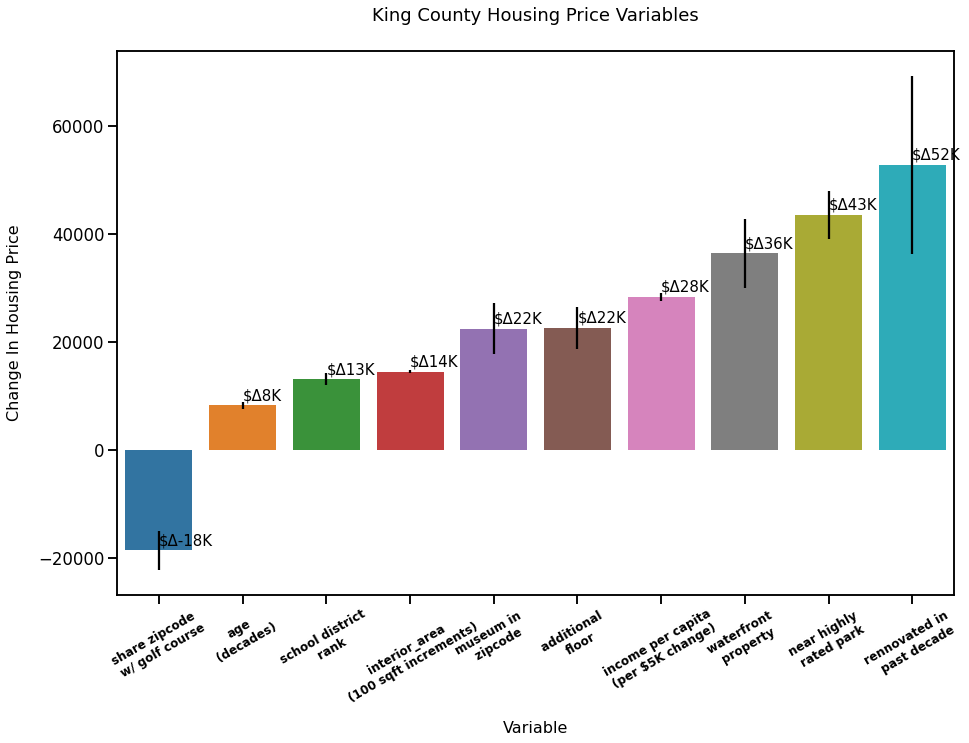

In [71]:
#make copy of df in order
#to manipulate scale
#to visualize coefficients
coeffs_graph_df = model_coeffs_df.copy()
#price per 5k change in income
coeffs_graph_df.loc[3, 'coeff']  = coeffs_graph_df.loc[3, 'coeff']*5000
coeffs_graph_df.loc[3, 'standard_error']  = coeffs_graph_df.loc[3, 'standard_error']*5000
#pric per 100 square feet
coeffs_graph_df.loc[9, 'coeff'] = coeffs_graph_df.loc[9, 'coeff']*100
coeffs_graph_df.loc[9, 'standard_error']  = coeffs_graph_df.loc[9, 'standard_error']*100
#delta 10 years (decades)
coeffs_graph_df.loc[0, 'coeff'] = coeffs_graph_df.loc[0, 'coeff']*10
coeffs_graph_df.loc[0, 'standard_error']  = coeffs_graph_df.loc[0, 'standard_error']*10

#create list to modify
#plot tickers
graph_xtick_list = ['share zipcode \nw/ golf course',
                    'age\n(decades)', 'school district\n rank',
                    'interior_area\n(100 sqft increments)',
                    'museum in \n zipcode','additional \nfloor',
                    'income per capita\n(per $5K change)',
                  'waterfront \nproperty','near highly \nrated park',
                     'rennovated in \n past decade']

income_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axs = income_figure.add_subplot(111)

#create bargraph with standard error intervals
#passing my standard error values
#to yerr as height for
#error bars to visualize confidence intervals
g = sns.barplot(x='feature', y='coeff', 
            data=coeffs_graph_df.sort_values(by='coeff'),
           yerr=coeffs_graph_df.sort_values(by='coeff').standard_error*1.96)



#add delta price value text
for index, value in enumerate(coeffs_graph_df.sort_values(by='coeff').coeff):
     g.text(x=index, y=value+1000, s=f'$Δ{int(value/1000)}K', size=15)



#label the graph
plt.title('King County Housing Price Variables', fontsize=18, pad=30)
plt.xlabel('Variable', fontsize=16, labelpad=16)
plt.ylabel('Change In Housing Price', fontsize=16, labelpad=16)
plt.xticks(ticks=coeffs_graph_df.feature.index, 
           labels=graph_xtick_list, rotation=30, size=12, fontweight='bold')


plt.savefig("./images/housing_price_variables.png", dpi=150)
plt.savefig("./images/housing_price_variables.pdf", dpi=150)
plt.show();

In [72]:
model_coeffs_sorted.dfi.export('images/model_coeffs.png')

## Filtered Data Model: Rent Target

## Baseline Model for Unfiltered Rent Target

In [73]:
X = df1.drop(['price','median_rent'] , axis=1)
y2= df1.median_rent

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, train_size = 0.7, test_size = 0.3, random_state = 111)

In [74]:
X_train_r = sm.add_constant(X_train2)

lr_r = sm.OLS(y_train2, X_train_r).fit()

lr_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            median_rent   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1301.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:12   Log-Likelihood:            -1.0448e+05
No. Observations:               15117   AIC:                         2.090e+05
Df Residuals:                   15097   BIC:                         2.092e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     282.0213     28.989      9.728      0.000     225.199     338.844
bedrooms                    0.7355      2.851      0.258      0.796      -4.853       6.324
bathrooms                  13.5871      4.752      2.859      0.004       4.272      22.902
sqft_living                -0.0038      0.005     -0.831      0.406      -0.013       0.005
sqft_lot                   -0.0009   5.11e-05    -17.363      0.000      -0.001      -0.001
floors                    -34.7038      5.011     -6.925      0.000     -44.527     -24.881
condition                  11.1144      3.334      3.334      0.001       4.580      17.648
grade                      10.7278      3.050      3.518      0.000       4.750      16.706
new_waterfront             21.4425      6.819      3.145      0.002       8.077      34.808
district_grade_num         30.8520      1.468     21.017      0.000      27.975      33.729
median_household_income     0.0076      0.000     66.238      0.000       0.007       0.008
income_per_capita           0.0004      0.000      1.681      0.093   -6.76e-05       0.001
health_disparity_index      7.2932      1.148      6.355      0.000       5.044       9.543
museum_zipcode            -85.8995      5.406    -15.890      0.000     -96.495     -75.304
stadium_zipcode             5.2240      6.168      0.847      0.397      -6.867      17.315
golf_zipcode              -16.1580      4.206     -3.841      0.000     -24.403      -7.913
near_park                  44.5384      5.379      8.280      0.000      33.994      55.082
age_at_sale                -0.6899      0.100     -6.912      0.000      -0.886      -0.494
recently_renovated        -18.7210     17.359     -1.078      0.281     -52.747      15.305
has_basement              -14.2187      4.751     -2.993      0.003     -23.532      -4.905
==============================================================================
Omnibus:                      755.828   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2594.993
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                       5.010   Cond. No.                     1.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
baseline_rent_lm = LinearRegression()

# Fit the model on X_train_final and y_train
baseline_rent_lm.fit(X_train2, y_train2)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train2 = baseline_rent_lm.predict(X_train2)
y_hat_test2 = baseline_rent_lm.predict(X_test2)

train_mae2 = mean_absolute_error(y_train2, y_hat_train2)
test_mae2 = mean_absolute_error(y_test2, y_hat_test2)


print('Train Score: ',baseline_rent_lm.score(X_train2, y_train2))
print('Train Mean Absolute Error:', train_mae2)

print('--------------------------------------------------')

print('Test Score: ', baseline_rent_lm.score(X_test2, y_test2))
print('Test Mean Absolute Error:', test_mae2)

Train Score:  0.620798940678466
Train Mean Absolute Error: 179.96333778097375
--------------------------------------------------
Test Score:  0.614824822527575
Test Mean Absolute Error: 180.2112910588833


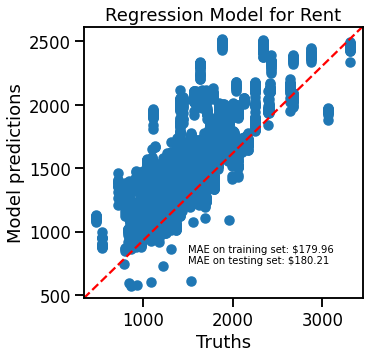

In [76]:
string_score = f'MAE on training set: ${train_mae2:.2f}'
string_score += f'\nMAE on testing set: ${test_mae2:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test2, y_hat_test2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(1500, 750, string_score)
plt.title('Regression Model for Rent')
plt.ylabel('Model predictions')
plt.xlabel('Truths');

In [77]:
VIF_calculator(X_train2)

,Features,VIF
6,grade,95.86
10,income_per_capita,45.01
8,district_grade_num,43.83
9,median_household_income,41.10
5,condition,30.50
1,bathrooms,29.14
0,bedrooms,24.21
2,sqft_living,22.38
4,floors,15.41
11,health_disparity_index,7.97


/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


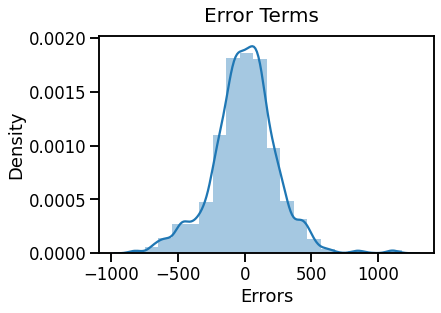

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()

preds = y_hat_test2
residuals = (y_test2 - preds)


sns.distplot(residuals, bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                

plt.xlabel('Errors', fontsize = 18);

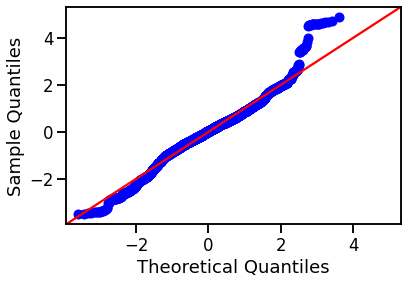

In [79]:
preds = y_hat_test2
residuals = (y_test2 - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

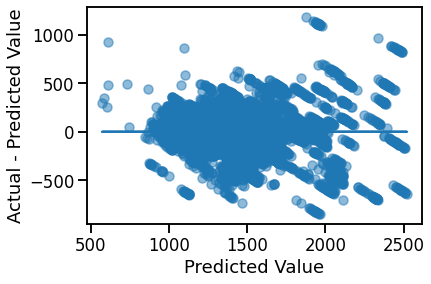

In [80]:
#test for homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test2))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

####  Summary of Unfiltered Rent Model Performance

Train Score:  0.620798940678466
Train Mean Absolute Error: 179.96333778097375

Test Score:  0.614824822527575
Test Mean Absolute Error: 180.2112910588833

The model proved to be slightly overfit. The MAE value was similar for both testing and training, and reveal an error of around \\$180 for price predictions. The QQ plot and distribution plot of the residuals reveal a right skew and a right tail for the distrubtion of errors, albeit not too dramatic. The plot of residuals to test  for homoscedasticity did not show any clear violations.

### Initial Model for Filtered Rent Data

In [81]:
X = new_df.drop(['price', 'median_rent'], axis=1)
y2 = new_df.median_rent

In [82]:
#split data into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, train_size = 0.7, test_size = 0.3, random_state = 111)

In [83]:
#create intial predictive model and check
#all p-values

X_train_rf = sm.add_constant(X_train2)

lr_rf = sm.OLS(y_train2, X_train_rf).fit()

lr_rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            median_rent   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1018.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:13   Log-Likelihood:                -93476.
No. Observations:               13800   AIC:                         1.870e+05
Df Residuals:                   13780   BIC:                         1.871e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     348.6029     27.489     12.682      0.000     294.721     402.485
bedrooms                    6.3815      2.729      2.338      0.019       1.032      11.731
bathrooms                  -3.8062      3.797     -1.002      0.316     -11.249       3.636
sqft_living                -0.0110      0.005     -2.395      0.017      -0.020      -0.002
sqft_lot                   -0.0008   4.94e-05    -16.936      0.000      -0.001      -0.001
condition                   9.9246      3.046      3.258      0.001       3.953      15.896
grade                      13.7681      2.880      4.781      0.000       8.124      19.413
new_waterfront             37.6930      6.670      5.651      0.000      24.619      50.767
district_grade_num         26.3037      1.331     19.766      0.000      23.695      28.912
median_household_income     0.0064      0.000     56.931      0.000       0.006       0.007
income_per_capita           0.0019      0.000      7.843      0.000       0.001       0.002
health_disparity_index      5.3632      1.115      4.810      0.000       3.178       7.549
museum_zipcode            -69.3793      5.008    -13.853      0.000     -79.196     -59.563
stadium_zipcode            27.1774      5.650      4.810      0.000      16.102      38.252
golf_zipcode               -6.6897      3.856     -1.735      0.083     -14.248       0.869
near_park                  29.6993      4.787      6.204      0.000      20.316      39.083
age_at_sale                -0.7017      0.086     -8.114      0.000      -0.871      -0.532
recently_renovated          6.0817     17.297      0.352      0.725     -27.823      39.987
has_basement               -7.5593      4.402     -1.717      0.086     -16.187       1.069
multi_story               -20.0184      4.496     -4.453      0.000     -28.830     -11.207
==============================================================================
Omnibus:                      204.502   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.546
Skew:                          -0.234   Prob(JB):                     2.90e-54
Kurtosis:                       3.457   Cond. No.                     1.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
#Although not every iteration is show here,
#this process was carried out stepwise in order
#to arrive at the final model


X_train_rp_fin = X_train2.drop(['recently_renovated', 'bathrooms',
                           'golf_zipcode', 'has_basement'], axis=1)
X_test_rp_fin = X_test2.drop(['recently_renovated', 'bathrooms',
                           'golf_zipcode', 'has_basement'], axis=1)

X_train_rp_finc = sm.add_constant(X_train_rp_fin)

lr_rpf = sm.OLS(y_train2, X_train_rp_finc).fit()

lr_rpf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            median_rent   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     1288.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:38:13   Log-Likelihood:                -93480.
No. Observations:               13800   AIC:                         1.870e+05
Df Residuals:                   13784   BIC:                         1.871e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     338.9726     27.089     12.513      0.000     285.874     392.071
bedrooms                    5.6519      2.689      2.102      0.036       0.381      10.923
sqft_living                -0.0147      0.004     -3.457      0.001      -0.023      -0.006
sqft_lot                   -0.0008   4.92e-05    -16.963      0.000      -0.001      -0.001
condition                   9.5021      3.020      3.146      0.002       3.582      15.422
grade                      14.1026      2.868      4.918      0.000       8.482      19.723
new_waterfront             37.7279      6.661      5.664      0.000      24.672      50.783
district_grade_num         26.4606      1.328     19.920      0.000      23.857      29.064
median_household_income     0.0064      0.000     58.427      0.000       0.006       0.007
income_per_capita           0.0019      0.000      7.993      0.000       0.001       0.002
health_disparity_index      5.5763      1.103      5.056      0.000       3.414       7.738
museum_zipcode            -69.4426      5.004    -13.877      0.000     -79.251     -59.634
stadium_zipcode            27.3703      5.649      4.846      0.000      16.298      38.442
near_park                  29.2529      4.755      6.152      0.000      19.932      38.574
age_at_sale                -0.6791      0.082     -8.260      0.000      -0.840      -0.518
multi_story               -17.2453      4.177     -4.129      0.000     -25.432      -9.059
==============================================================================
Omnibus:                      200.406   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.202
Skew:                          -0.233   Prob(JB):                     6.93e-53
Kurtosis:                       3.448   Cond. No.                     1.79e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
predictive_rent_lm = LinearRegression()

# Fit the model on X_train_final and y_train
predictive_rent_lm.fit(X_train_rp_fin, y_train2)

# Score the model on X_test_final and y_test
# (use the built-in .score method)

y_hat_train2 = predictive_rent_lm.predict(X_train_rp_fin)
y_hat_test2 = predictive_rent_lm.predict(X_test_rp_fin )

train_mae2 = mean_absolute_error(y_train2, y_hat_train2)
test_mae2 = mean_absolute_error(y_test2, y_hat_test2)


print('Train Score: ',predictive_rent_lm.score(X_train_rp_fin, y_train2))
print('Train Mean Absolute Error:', train_mae2)

print('--------------------------------------------------')

print('Test Score: ', predictive_rent_lm.score(X_test_rp_fin , y_test2))
print('Test Mean Absolute Error:', test_mae2)

Train Score:  0.5836960366808019
Train Mean Absolute Error: 163.21287121452102
--------------------------------------------------
Test Score:  0.5821658335321243
Test Mean Absolute Error: 163.67073938729447


/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


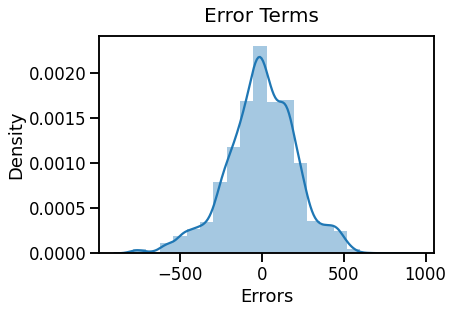

In [86]:
fig = plt.figure()

preds = y_hat_test2
residuals = (y_test2 - preds)


sns.distplot(residuals, bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                

plt.xlabel('Errors', fontsize = 18);

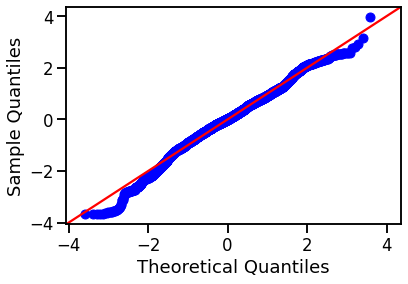

In [87]:
preds = y_hat_test2
residuals = (y_test2 - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

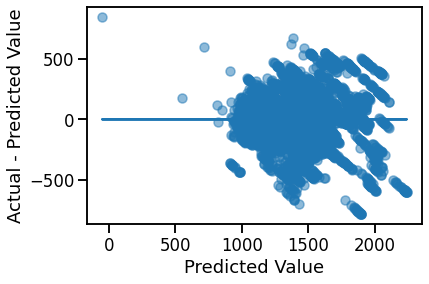

In [88]:
#test for homoscedasticity

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test2))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

#### Final Predictive Rent Model Summary


Train Score:  0.5836960366808019
Train Mean Absolute Error: 163.21287121452102

Test Score:  0.5821658335321243
Test Mean Absolute Error: 163.67073938729447

The model is slightly overfit. The resdiuals appear to satisfy the normality assumption. The mean absolute error between the test and train sets are very similar. About 58% of the variance in rent is explained by the variance of this model.  

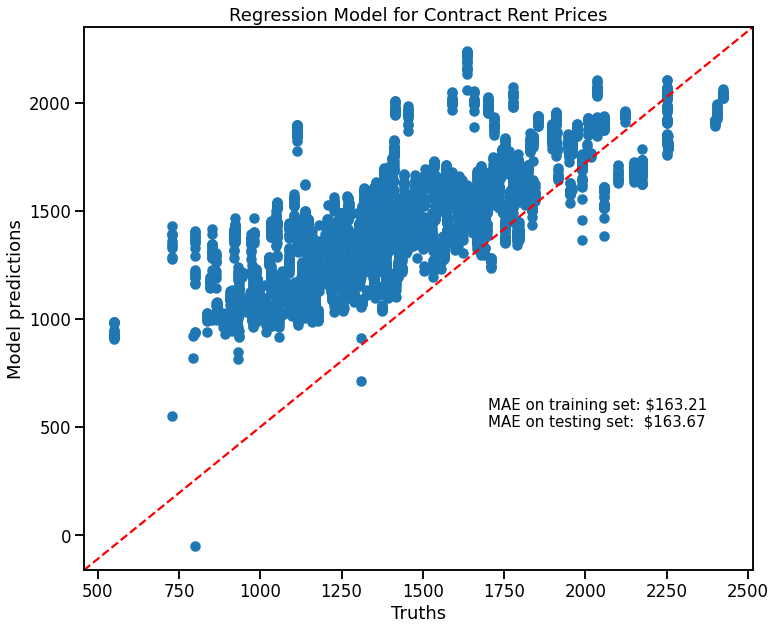

In [89]:
#add strings for MAEs
string_score = f'MAE on training set: ${train_mae2:.2f}'
string_score += f'\nMAE on testing set:  ${test_mae2:.2f}'
#initiate figure
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(y_test2, y_hat_test2)
#create 'perfect fit' line
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
#position text
plt.text(1700, 500, string_score, size=15)
plt.title('Regression Model for Contract Rent Prices')
plt.ylabel('Model predictions')
plt.xlabel('Truths')

plt.savefig("./images/rental_price_predictions.png", dpi=150)
plt.savefig("./images/renal_price_predictions.pdf", dpi=150)
plt.show();